In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import clear_output, display
from sklearn.datasets import make_blobs

<AxesSubplot:xlabel='x', ylabel='y'>

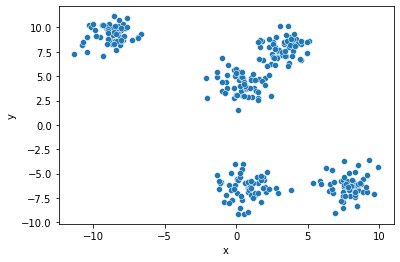

In [104]:
observations = 300
X, y = make_blobs(n_samples=observations, n_features=2, centers=5)
data = pd.DataFrame(X)
data.columns = ['x', 'y']
sns.scatterplot(data=data, x=data.x, y=data.y)

In [102]:
X, y = make_blobs(n_samples=observations, n_features=2)

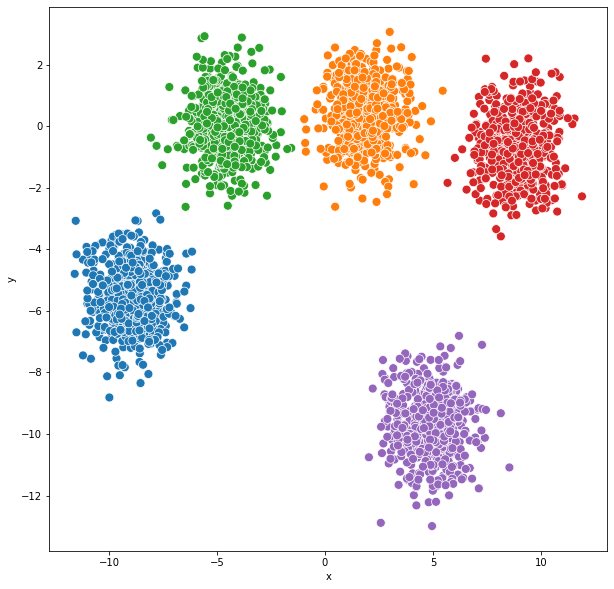

DONE
3


In [127]:
observations = 3000
k = 5


X, y = make_blobs(n_samples=observations, n_features=2, centers=k, random_state=170)
data = pd.DataFrame(X)
data.columns = ['x', 'y']
centers = data.sample(n=k).to_numpy()

for iteration in range(100):
    distances = pd.DataFrame()
    for index, center in enumerate(centers):
        distances[index] = (data.x - center[0]) ** 2 + (data.y - center[1]) ** 2

    data['label'] = distances.apply(np.argmin, axis=1)

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    sns.scatterplot(data=data, x='x', y='y', hue='label', ax=ax, palette='tab10', s=80)
    ax.get_legend().remove()
    display(fig)
    clear_output(wait=True)
    plt.pause(0.5)
    
    old_centers = centers.copy()
    centers = [data[data.label == i][['x', 'y']].apply(np.mean).to_numpy() for i in range(k)]
    if np.array_equal(centers, old_centers):
        print("DONE")
        print(iteration)
        break

plt.show()